In [ ]:
!pip install scikit-learn pandas matplotlib seaborn xgboost

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import random

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving online_payment_fraud_dataset.csv to online_payment_fraud_dataset (1).csv


In [ ]:
df = pd.read_csv(next(iter(uploaded)))

In [ ]:
print(df.head())
print(df.info())

  Transaction_ID      Amount  Time_Since_Last_Transaction  Location_Match  \
0      TXN006252  338.139569                     3.057399               1   
1      TXN004684  775.729791                    46.730939               1   
2      TXN001731  624.271940                     7.027539               0   
3      TXN004742   36.554641                    49.182326               1   
4      TXN004521  577.539965                    85.373134               1   

   Device_Match Transaction_Channel Merchant_Category  User_Age  \
0             1              Mobile           Grocery        29   
1             1                 Web            Retail        38   
2             0                 Web            Dining        62   
3             1              Mobile            Retail        25   
4             1              Mobile       Electronics        32   

   Account_Tenure  Fraud_Label  
0        3.500780            0  
1        0.419479            0  
2        9.560140            0  
3 

In [ ]:
df = df.dropna()

In [ ]:
le = LabelEncoder()
df['User_Age'] = le.fit_transform(df['User_Age'])

In [ ]:
X = df.drop(columns=['Location_Match'])
y = df['Device_Match']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
for col in ['Transaction_ID', 'Transaction_Channel', 'Merchant_Category']:
    X_train[col] = X_train[col].astype('category').cat.codes
    X_test[col] = X_test[col].astype('category').cat.codes

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:05:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
print("XGBoost Model Performance:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       978
           1       1.00      1.00      1.00      1022

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
dnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4904 - loss: 124.1477 - val_accuracy: 0.4875 - val_loss: 4.3006
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4870 - loss: 11.7993 - val_accuracy: 0.5115 - val_loss: 0.7126
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4985 - loss: 2.2086 - val_accuracy: 0.5110 - val_loss: 0.6950
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4998 - loss: 1.2098 - val_accuracy: 0.5110 - val_loss: 0.6930
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4967 - loss: 0.8977 - val_accuracy: 0.5110 - val_loss: 0.6930
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4941 - loss: 0.8196 - val_accuracy: 0.5110 - val_loss: 0.6931
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4973 - loss: 0.7631 - val_accuracy: 0.4890 - val_loss: 0.6932
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.4954 - loss: 0.7906 - val_accuracy

In [ ]:
y_pred_dnn = (dnn_model.predict(X_test) > 0.5).astype(int)
print("DNN Model Performance:")
print(classification_report(y_test, y_pred_dnn))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
DNN Model Performance:
              precision    recall  f1-score   support

           0       0.49      1.00      0.66       978
           1       0.00      0.00      0.00      1022

    accuracy                           0.49      2000
   macro avg       0.24      0.50      0.33      2000
weighted avg       0.24      0.49      0.32      2000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
class WhaleOptimization:
    def __init__(self, obj_func, dim, lb, ub, population_size=10, max_iter=20):
        self.obj_func = obj_func
        self.dim = dim
        self.lb = np.array(lb)
        self.ub = np.array(ub)
        self.population_size = population_size
        self.max_iter = max_iter
        self.best_solution = None
        self.best_fitness = float("inf")

    def optimize(self):
        population = np.random.uniform(self.lb, self.ub, (self.population_size, self.dim))
        fitness = np.array([self.obj_func(ind) for ind in population])
        self.best_solution = population[np.argmin(fitness)]
        self.best_fitness = np.min(fitness)

        for t in range(self.max_iter):
            a = 2 - t * (2 / self.max_iter)
            for i in range(self.population_size):
                A = 2 * a * np.random.rand(self.dim) - a
                C = 2 * np.random.rand(self.dim)

                p = np.random.rand()
                if p < 0.5:
                    D = np.abs(C * self.best_solution - population[i])
                    new_position = self.best_solution - A * D
                else:
                    new_position = np.random.uniform(self.lb, self.ub, self.dim)

                new_position = np.clip(new_position, self.lb, self.ub)
                new_fitness = self.obj_func(new_position)

                if new_fitness < fitness[i]:
                    population[i] = new_position
                    fitness[i] = new_fitness

            self.best_solution = population[np.argmin(fitness)]
            self.best_fitness = np.min(fitness)

        return self.best_solution

In [ ]:
def objective_function(params):
    max_depth, learning_rate = int(params[0]), params[1]
    model = xgb.XGBClassifier(max_depth=max_depth, learning_rate=learning_rate, use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return 1 - accuracy_score(y_test, preds)

In [ ]:
dim = 2  # max_depth, learning_rate
lb = [3, 0.01]
ub = [10, 0.3]

In [ ]:
woa = WhaleOptimization(objective_function, dim, lb, ub, population_size=5, max_iter=10)
best_params = woa.optimize()

print(f"Optimized Parameters (WOA): max_depth={int(best_params[0])}, learning_rate={best_params[1]}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:06:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:06:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:06:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:06:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:06:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Optimized Parameters (WOA): max_depth=9, learning_rate=0.05685377932447911


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:06:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
optimized_xgb = xgb.XGBClassifier(max_depth=int(best_params[0]), learning_rate=best_params[1], use_label_encoder=False, eval_metric='logloss')
optimized_xgb.fit(X_train, y_train)
y_pred_opt_xgb = optimized_xgb.predict(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:06:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
print("Optimized XGBoost Performance:")
print(classification_report(y_test, y_pred_opt_xgb))

Optimized XGBoost Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       978
           1       1.00      1.00      1.00      1022

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

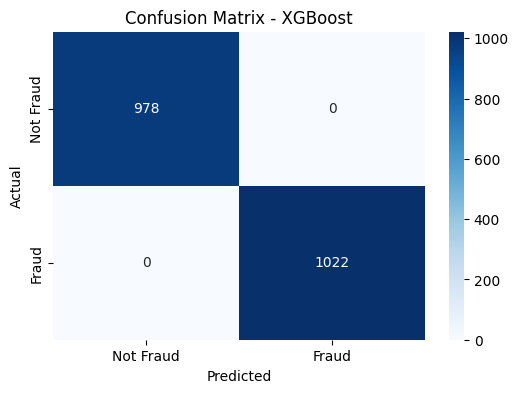

In [ ]:
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")


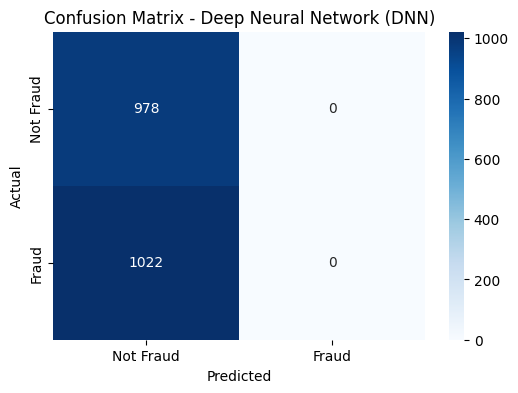

In [ ]:
plot_confusion_matrix(y_test, y_pred_dnn, "Deep Neural Network (DNN)")


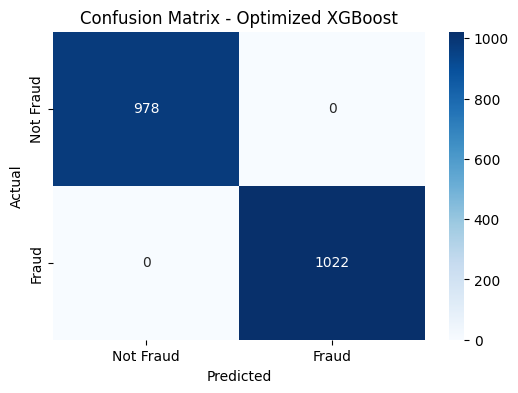

In [ ]:
plot_confusion_matrix(y_test, y_pred_opt_xgb, "Optimized XGBoost")

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 600x500 with 0 Axes>

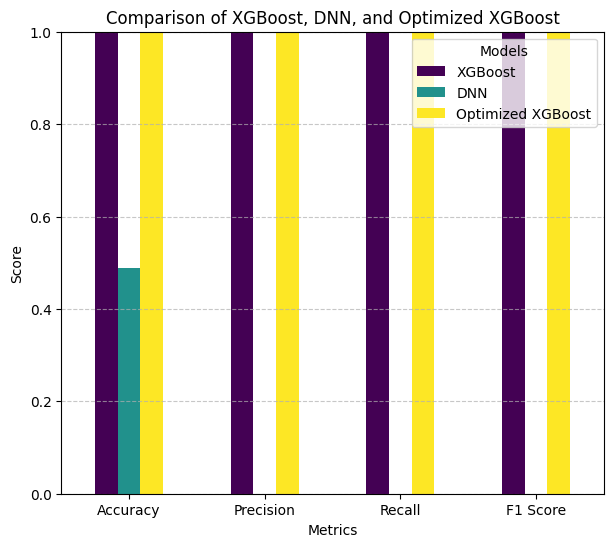

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to calculate evaluation metrics
def get_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return [accuracy, precision, recall, f1]

xgb_scores = get_metrics(y_test, y_pred_xgb)
dnn_scores = get_metrics(y_test, y_pred_dnn)
opt_xgb_scores = get_metrics(y_test, y_pred_opt_xgb)

metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

df_comparison = pd.DataFrame({
    'Metric': metrics_labels,
    'XGBoost': xgb_scores,
    'DNN': dnn_scores,
    'Optimized XGBoost': opt_xgb_scores
})

plt.figure(figsize=(6, 5))
df_comparison.set_index('Metric').plot(kind='bar', colormap='viridis', figsize=(7, 6))
plt.title("Comparison of XGBoost, DNN, and Optimized XGBoost")
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(title="Models")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


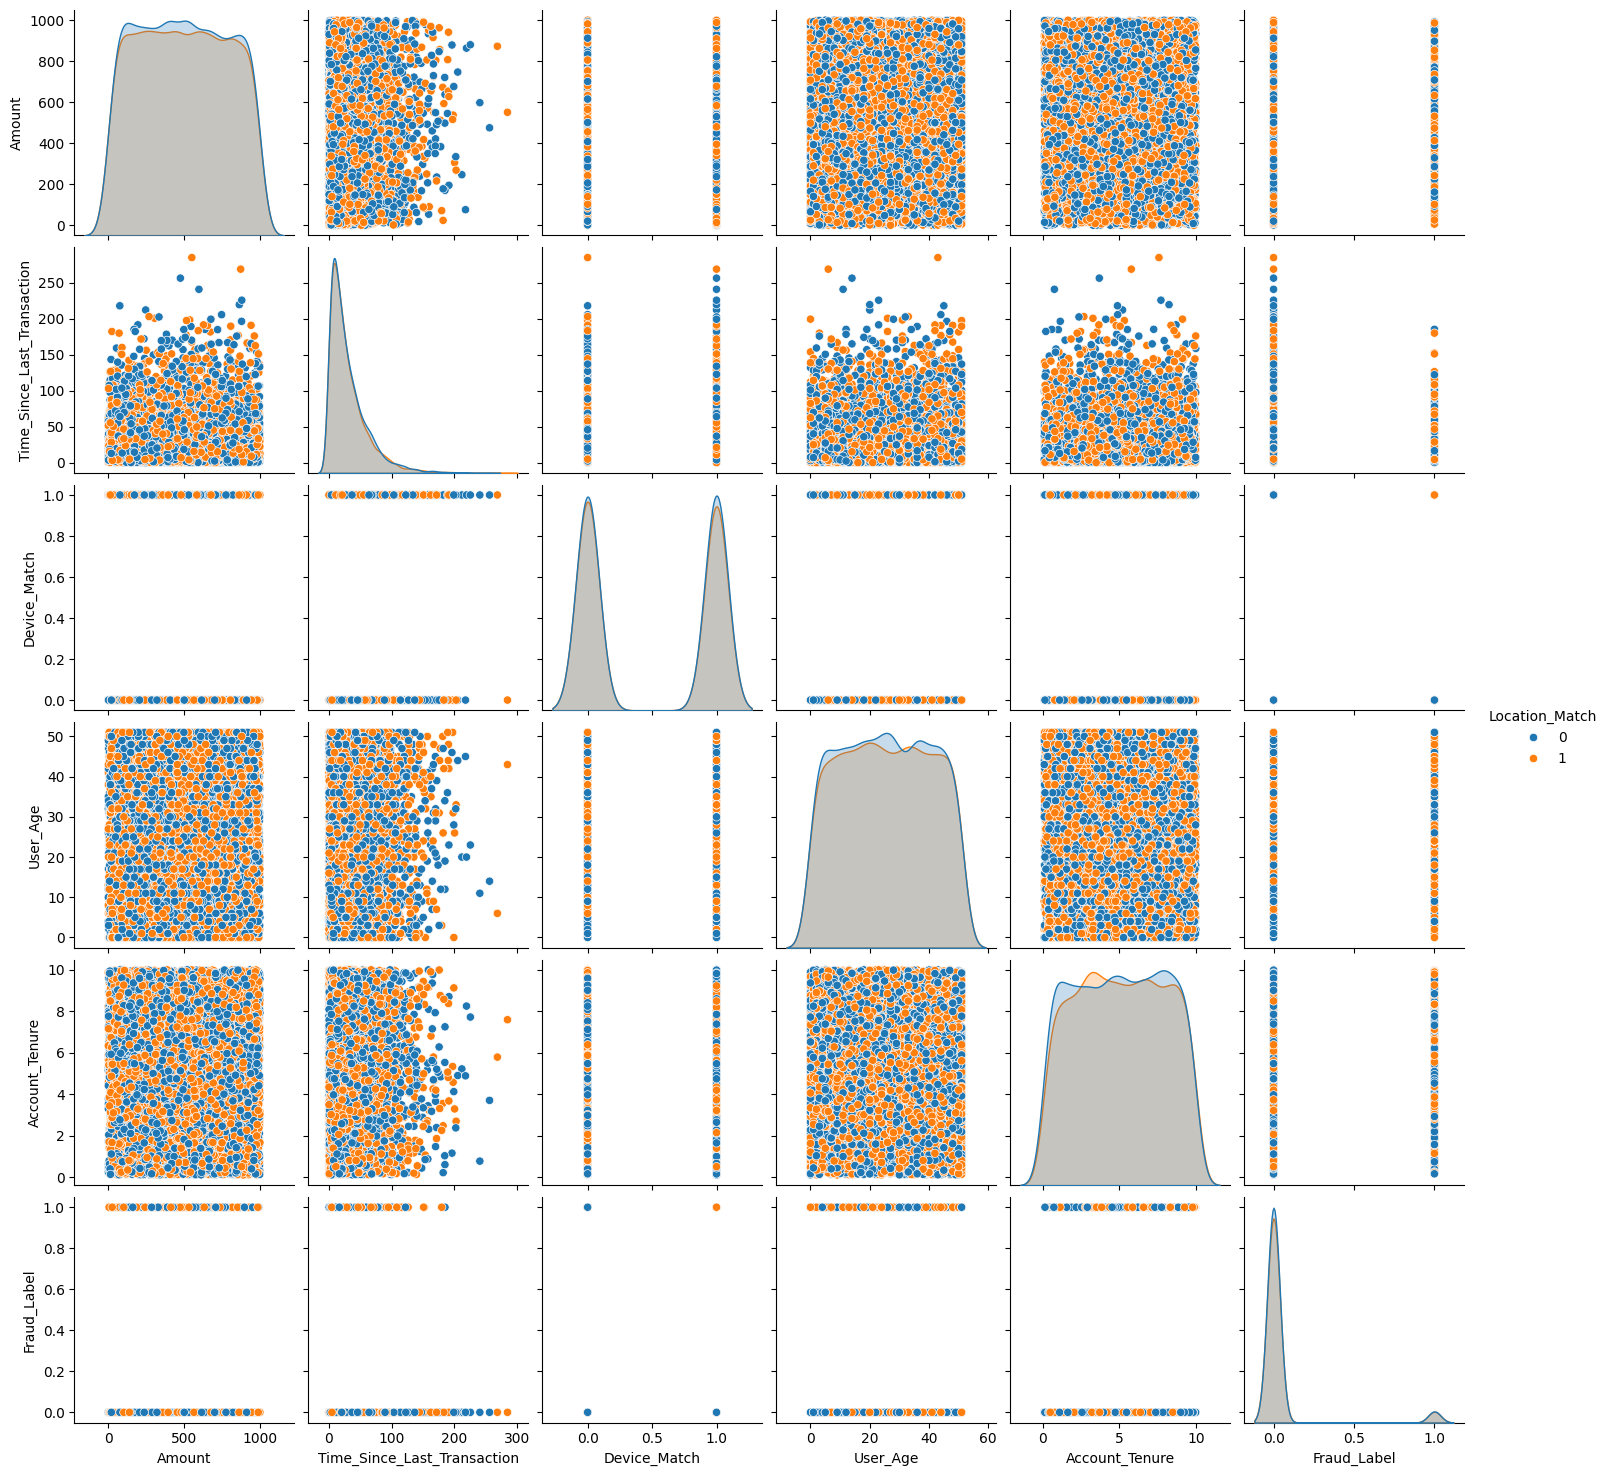

In [ ]:
sns.pairplot(df, hue="Location_Match")
plt.show()